In [1]:
import tensorflow
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import TimeDistributed
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [2]:
f50 = np.load("f50.npy")
f100 = np.load("f100.npy")
f150 = np.load("f150.npy")
f200 = np.load("f200.npy")
f50_100 = np.load("f50_100.npy")

In [3]:
f50_100_target = []
for i in range(100):
    zero_um = (0,1)
    f50_100_target.append(zero_um)

for i in range(100):
    um_zero = (1,0)
    f50_100_target.append(um_zero)

In [4]:
# f50_100_target

In [5]:
X = np.reshape(f50_100, (200, 1000, 1))
y = np.array(f50_100_target)

In [6]:
y

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

In [7]:
import math
n_input_layer = 1000
n_output_layer = 1
n_hidden_layer = round(math.sqrt((n_input_layer*n_output_layer)))
print("nro de neurônios na hidden layer:", n_hidden_layer)

nro de neurônios na hidden layer: 32


In [8]:
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

In [9]:
model=Sequential()
model.add(SimpleRNN(n_hidden_layer, 
                    input_shape=(1000,1), 
                    kernel_initializer='random_normal'))
model.add(Dense(2, activation='sigmoid'))
# model.compile(loss = 'mse', optimizer = 'rmsprop')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 32)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 1,154
Trainable params: 1,154
Non-trainable params: 0
_________________________________________________________________


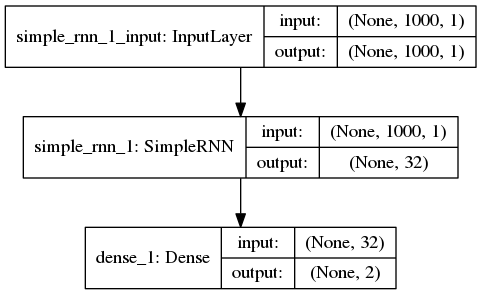

In [10]:
from keras.utils.vis_utils import plot_model
import graphviz
from interface import implements, Interface
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [12]:
history = model.fit(X, y, epochs = 20, batch_size = 32, callbacks=[es])

Epoch 1/20
200/200 [==============================] - 2s 8ms/step - loss: 0.5511 - accuracy: 0.9200
Epoch 2/20


/home/ryo/miniconda/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


200/200 [==============================] - 2s 8ms/step - loss: 0.3854 - accuracy: 1.0000
Epoch 3/20
200/200 [==============================] - 1s 6ms/step - loss: 0.2761 - accuracy: 1.0000
Epoch 4/20
200/200 [==============================] - 1s 5ms/step - loss: 0.1913 - accuracy: 1.0000
Epoch 5/20
200/200 [==============================] - 1s 5ms/step - loss: 0.2895 - accuracy: 0.9100
Epoch 6/20
200/200 [==============================] - 1s 5ms/step - loss: 0.1225 - accuracy: 1.0000
Epoch 7/20
200/200 [==============================] - 1s 5ms/step - loss: 0.0980 - accuracy: 1.0000
Epoch 8/20
200/200 [==============================] - 1s 6ms/step - loss: 0.1153 - accuracy: 0.9700
Epoch 9/20
200/200 [==============================] - 1s 6ms/step - loss: 0.1267 - accuracy: 1.0000
Epoch 10/20
200/200 [==============================] - 1s 7ms/step - loss: 0.1819 - accuracy: 1.0000
Epoch 11/20
200/200 [==============================] - 1s 6ms/step - loss: 0.1646 - accuracy: 1.0000
Epoch 12/

In [13]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


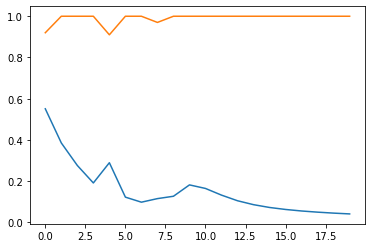

In [15]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['accuracy'], label='test')

In [16]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
pi = 3.1415
N = 1000
t = np.arange(0,N)
f = 100

In [18]:
qtd_amostras = 20
test = []
test_target = []

f = 50
for onda_da_frequencia in range(qtd_amostras):
    x=np.sin(2*pi*f*t+np.random.rand(1)) 
    test_target.append(zero_um)
    test.append(x)
    
f = 100
for onda_da_frequencia in range(qtd_amostras):
    x=np.sin(2*pi*f*t+np.random.rand(1))    
    test_target.append(um_zero)
    test.append(x)
    
test = np.reshape(test, (40, 1000, 1))

In [19]:
predictions = model.predict(test)
for i in range(len(test)):
    print(predictions[i], 'expected', test_target[i])

[0.03413856 0.9593419 ] expected (0, 1)
[0.04577486 0.950828  ] expected (0, 1)
[0.04276916 0.95312613] expected (0, 1)
[0.03777887 0.95681256] expected (0, 1)
[0.03266821 0.9602979 ] expected (0, 1)
[0.0373441 0.9571236] expected (0, 1)
[0.03187777 0.9607869 ] expected (0, 1)
[0.03797767 0.9566697 ] expected (0, 1)
[0.03279895 0.9602151 ] expected (0, 1)
[0.04682929 0.95001125] expected (0, 1)
[0.04076264 0.9546309 ] expected (0, 1)
[0.03657501 0.9576686 ] expected (0, 1)
[0.03211332 0.9606435 ] expected (0, 1)
[0.03409017 0.959374  ] expected (0, 1)
[0.0363408 0.9578332] expected (0, 1)
[0.03465313 0.9589964 ] expected (0, 1)
[0.03258153 0.9603525 ] expected (0, 1)
[0.03193441 0.96075255] expected (0, 1)
[0.0329927 0.9600915] expected (0, 1)
[0.03451763 0.95908785] expected (0, 1)
[0.9671193  0.03987347] expected (1, 0)
[0.96739745 0.03970918] expected (1, 0)
[0.9692192  0.03873119] expected (1, 0)
[0.96780413 0.03947413] expected (1, 0)
[0.9688094  0.03892861] expected (1, 0)
[0.968

In [20]:
test_target_arr = np.array(test_target)

In [21]:
predictions_rounded = np.matrix.round(predictions)

In [22]:
y_test_classes = test_target_arr.argmax(1)
y_pred_classes = predictions_rounded.argmax(1)

In [23]:
y_pred_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
y_test_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred_classes, y_test_classes)

In [26]:
print(matrix)

[[20  0]
 [ 0 20]]
